In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
pyber1 = pd.read_csv(city_data_to_load)
pyber2 = pd.read_csv(ride_data_to_load)
pyber3 = pyber2.drop_duplicates(subset=["city"], keep="first")

# Combine the data into a single dataset
combined = pd.merge(pyber2, pyber1, on="city")
combined1 = pd.merge(pyber3, pyber1, on="city")

# Display the data table for preview
#combined.head()
combined1.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

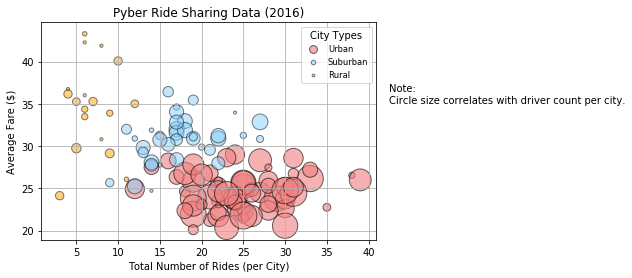

In [27]:
# Obtain the x and y coordinates for each of the three city types
urban = combined.loc[combined["type"] == "Urban"]
urb = urban.groupby("city")
number_of_rides = urb["fare"].count()
average_fare = urb["fare"].mean()
sizes = urb["driver_count"].mean()

#unnecessary code, made it more complicated then it needed to be
#numb = [x for x in number_of_rides]
#avg = [x for x in average_fare]
#urban_nodupes = urban.drop_duplicates(subset=["city"])
#size = urban_nodupes["driver_count"]
#sizes = [x for x in size]
#sizes = np.array(sizes)

suburban = combined.loc[combined["type"] == "Suburban"]
surb = suburban.groupby("city")
number_of_rides_s = surb["fare"].count()
average_fare_s = surb["fare"].mean()
sizes_s = surb["driver_count"].mean()

#unnecessary code, made it more complicated then it needed to be
#numb_s = [x for x in number_of_rides_s]
#avg_s = [x for x in average_fare_s]
#surban_nodupes = suburban.drop_duplicates(subset=["city"])
#size_s = surban_nodupes["driver_count"]
#sizes_s = [x for x in size_s]
#sizes_s = np.array(sizes_s)

rural = combined.loc[combined["type"] == "Rural"]
rur = rural.groupby("city")
number_of_rides_r = rur["fare"].count()
average_fare_r = rur["fare"].mean()
sizes_r = rur["driver_count"].mean()

#unnecessary code, made it more complicated then it needed to be
#numb_r = [x for x in number_of_rides_r]
#avg_r = [x for x in average_fare_r]
#rural_nodupes = rural.drop_duplicates(subset=["city"])
#size_r = rural_nodupes["driver_count"]
#sizes_r = [x for x in size_r]
#sizes_r = np.array(sizes_r)

# Build the scatter plots for each city types
plt.scatter(number_of_rides, average_fare, s=sizes*10, marker="o", facecolors="lightcoral", edgecolors="black", label="Urban", alpha=0.6)
plt.scatter(number_of_rides_s, average_fare_s, s=sizes_s*10, marker="o", facecolors="lightskyblue", edgecolors="black", label="Suburban", alpha=0.5)
plt.scatter(number_of_rides_r, average_fare_r, s=sizes_r*10, marker="o", facecolors="orange", edgecolors="black", label="Rural", alpha=0.5)

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(title="City Types", fontsize="small", markerscale=0.4)

# Incorporate a text label regarding circle size
plt.figtext(.93,0.6,"Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Images/ridesharing.png")
plt.show()

## Total Fares by City Type

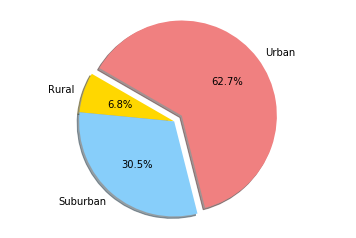

In [7]:
# Calculate Type Percents
total_fare_city = combined.groupby('type')

sum_fare = total_fare_city["fare"].sum()
type_list = sum_fare.keys()

# Build Pie Chart
typelabel = [x for x in type_list]
typefare = [x for x in sum_fare]  

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(typefare, explode=explode, labels=typelabel, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig("Images/faresbycity.png")
plt.show()

## Total Rides by City Type

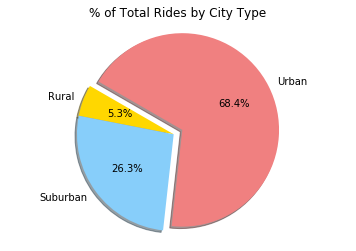

In [82]:
# Calculate Ride Percents
rides = combined.groupby("type")
total_rides = rides["city"].count()
count_rides = [x for x in total_rides]

# Build Pie Chart
# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.title("% of Total Rides by City Type")
plt.pie(count_rides, explode=explode, labels=typelabel, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.axis("equal")
plt.savefig("Images/ridesbycity.png")
plt.show()

## Total Drivers by City Type

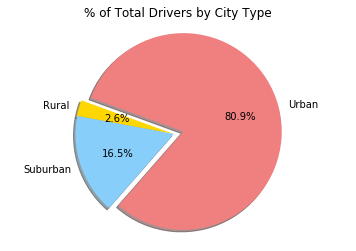

In [12]:
# Calculate Driver Percents
total_d = pyber1.groupby("type")
total_drivers = total_d["driver_count"].sum()

count_drivers = [x for x in total_drivers]

# Build Pie Charts
# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.title("% of Total Drivers by City Type")
plt.pie(count_drivers, explode=explode, labels=typelabel, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

# Save Figure
plt.axis("equal")
plt.savefig("Images/totaldriversbycity.png")
plt.show()